In [5]:
import subprocess
import matplotlib.pyplot as plt

# Define the ranges of n and n_t to test
# n_values = [100, 1000, 10000, 100000, 1000000]
# n_t_values = [1, 2, 4, 8]
n_values = [102400, 1024000, 10240000, 102400000]
n_t_values = [1, 2, 4, 8, 16]


In [8]:
# Run the program for each combination of n and n_t, and record the time taken
results = {}
for n in n_values:
    for n_t in n_t_values:
        cmd = ['./p.exe', str(n), str(n_t)]
        result = subprocess.run(cmd, capture_output=True, text=True)
        if result.returncode != 0:
            print(f'Error executing command {cmd}: {result.stderr}')
        else:
            last_number, time_taken = result.stdout.strip().rsplit(':', 1)
            time_taken = float(time_taken.strip()[:-2])
            results[(n, n_t)] = time_taken

print(results)
# Plot the results on a graph

{(102400, 1): 0.00999999, (102400, 2): 0.013, (102400, 4): 0.013, (102400, 8): 0.0149999, (102400, 12): 0.0180001, (102400, 16): 0.0239999, (1024000, 1): 0.075, (1024000, 2): 0.086, (1024000, 4): 0.0719998, (1024000, 8): 0.0579998, (1024000, 12): 0.0450001, (1024000, 16): 0.039, (10240000, 1): 1.166, (10240000, 2): 0.73, (10240000, 4): 0.647, (10240000, 8): 0.597, (10240000, 12): 0.749, (10240000, 16): 0.832, (102400000, 1): 9.336, (102400000, 2): 7.414, (102400000, 4): 7.827, (102400000, 8): 7.661, (102400000, 12): 7.087, (102400000, 16): 7.134}


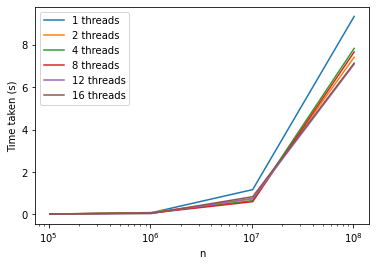

In [9]:
# Plot the results on a graph
fig, ax = plt.subplots()
for n_t in n_t_values:
    ax.plot(n_values, [results[(n, n_t)] for n in n_values], label=f'{n_t} threads')
ax.legend()
ax.set_xlabel('n')
ax.set_ylabel('Time taken (s)')
ax.set_xscale('log') # Set the x-axis to a logarithmic scale
# ax.set_yscale('log') # Set the y-axis to a logarithmic scale
plt.show()
